Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques:
- SQL, RGPD, Web Scraping et API
- Pandas
- Machine Learning
- Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

** Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard (voir mail) dans le dépôt dont le lien vous a été communiqué par mail. **   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

**Rappel des livrables** :

**BLOC 1,2,3** :
1 fichier colab Notebook "Certification Data analyst - Cas Pratiques" avec les résultats attendus et commentés à l’écrit


**BLOC 4** :

1 Fichier Power Bi

1 Présentation (sous forme .pdf ou .ppt)


Veuillez mettre via le lien de dépôt reçu par mail, vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du jury à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

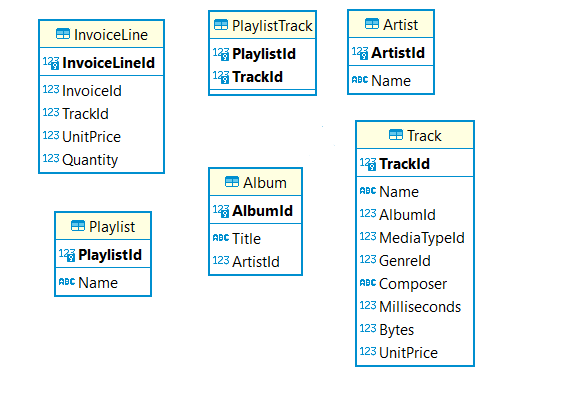

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

**Réponse :**

PlaylistTrack --- Playlist. Clé primaire : Playlist[PlaylistId] Clé étrangère: PlaylistTrack[PlaylistId]

PlaylistTrack --- Track. Clé primaire : Track[TrackId] Clé étrangère: PlaylistTrack[TrackId]

Album --- Artist. Clé primaire: Artist[ArtistId] Clé étrangère: Album[ArtistId]

Track --- Album. Clé primaire: Album[AlbumId] Clé étrangère: Track[AlbumId]

InvoiceLineId --- Track. Clé primaire : Track[TrackId] Clé étrangère: InvoiceLineId[TrackId]

> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



PlaylistTrack est une table intermédiaire. Les tables intermédiaires sont recommandées afin de lier entre elles des tables qui n'ont pas de clés communes et qui ont une relation many to many.

**Réponse:**

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')

In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

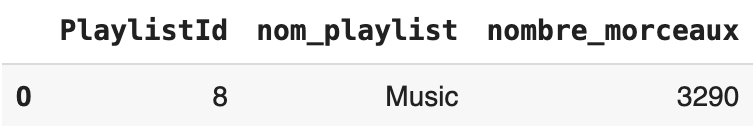

In [3]:
pd.read_sql('''
            SELECT
                p.PlaylistId,
                p.Name,
                COUNT(pt.TrackId) as nombre_morceaux

            FROM
                Playlist p
            JOIN
                PlaylistTrack pt ON pt.PlaylistID = p.PlaylistId
            GROUP BY
                p.PlayListId
            ORDER BY
                nombre_morceaux DESC
            LIMIT 2
            ''', conn)

# Le nombre de TrackId a été calculé en regroupant par PlaylistId afin d'obtenir le résultat.

,PlaylistId,Name,nombre_morceaux
0,1,Music,3290
1,8,Music,3290


> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 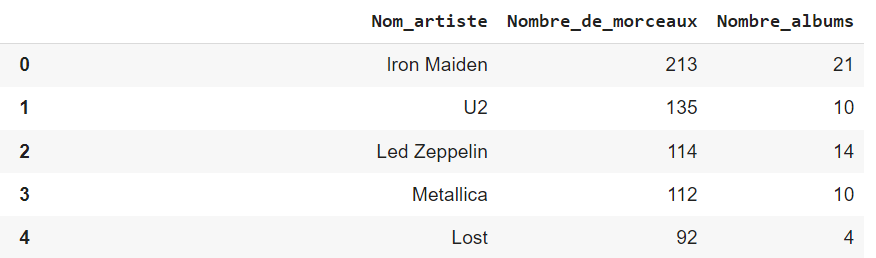

In [4]:
pd.read_sql('''
            SELECT
                a.Name as Nom_artiste,
                COUNT(t.TrackId) as Nombre_de_morceaux,
                COUNT(DISTINCT(al.AlbumId)) as Nombre_albums

            FROM
                Artist a
            JOIN
                Album al ON al.ArtistId = a.ArtistId,
                Track t ON al.AlbumId = t.AlbumId
            GROUP BY
                a.ArtistId
            ORDER BY
                Nombre_de_morceaux DESC

            ''', conn)

# Le nombre de TrackId a été calculé ainsi que le nombre d'AlbumId distincts en regroupant par ArtistId.

,Nom_artiste,Nombre_de_morceaux,Nombre_albums
0,Iron Maiden,213,21
1,U2,135,10
2,Led Zeppelin,114,14
3,Metallica,112,10
4,Lost,92,4
...,...,...,...
199,Aaron Goldberg,1,1
200,Luciana Souza/Romero Lubambo,1,1
201,Cake,1,1
202,Aquaman,1,1


> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

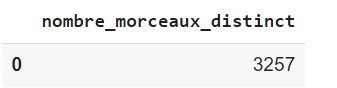

In [5]:
pd.read_sql('''
            SELECT
                COUNT(DISTINCT(Name)) as nombre_morceaux_distincts

            FROM
                Track

            ''', conn)

# Le nombre de noms de morceaux distincts a été calculé.

,nombre_morceaux_distincts
0,3257


> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

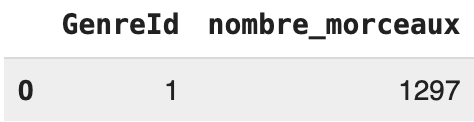

In [6]:
pd.read_sql('''
            SELECT
                GenreId,
                COUNT(TrackId) as Nombre_de_morceaux

            FROM
                Track
            GROUP BY
                GenreId
            ORDER BY
                Nombre_de_morceaux DESC
            LIMIT 1
            ''', conn)

# Le nombre de TrackId a été calculé en regroupant par GenreID.

,GenreId,Nombre_de_morceaux
0,1,1297


---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**

La RGPD signifie le règlement général sur la protection des données.

Son objectif est d'établir des règles dans le traitement des données afin de protéger les citoyens notamment. Les organisations ont ainsi un cadre concernant la collecte et l'utilisation des données, ce qui les responsbilise dans leurs pratiques.

---

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**

Response [200] signifie que ta requête a fonctionné correctement.

Response [404] signifie que la page recherchée est introuvable. Ta requête n'est donc pas correcte pour mener à la page souhaitée.

---


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [7]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [8]:
import requests

link = 'https://api-adresse.data.gouv.fr/reverse/?'

url = link + 'lon=' + str(longitude_appartement) + '&' + 'lat=' + str(latitude_appartement)

r = requests.get(url).json()
adresse = r['features'][0]['properties']['label']

adresse

# A partir de l'API, un lien a été créé avec la latitude et la longitude, dans la réponse de l'API
# il a été possible de récupérer l'adresse complète.

'111 Rue Damrémont 75018 Paris'

---

# Pandas _(2 heures)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [9]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions.head()

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29


In [10]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                290 non-null    object 
 1   valeur_fonciere            290 non-null    float64
 2   surface_reelle_bati        290 non-null    int64  
 3   prix_m2                    290 non-null    int64  
 4   nombre_pieces_principales  290 non-null    int64  
 5   type_local                 290 non-null    object 
 6   nom_commune                290 non-null    object 
 7   nom_iris                   290 non-null    object 
 8   code_commune               290 non-null    int64  
 9   code_departement           290 non-null    int64  
 10  code_iris                  290 non-null    int64  
 11  id_parcelles               290 non-null    object 
 12  longitude                  290 non-null    float64
 13  latitude                   290 non-null    float64

In [11]:
df_transactions.describe()

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
count,2.900000e+02,290.000000,290.000000,290.000000,290.000000,290.0,2.900000e+02,290.000000,290.000000
mean,1.473177e+06,166.324138,10299.355172,2.231034,75113.537931,75.0,7.511407e+08,2.337629,48.863934
std,1.187590e+07,1032.764258,2838.395323,1.127696,4.830011,0.0,5.023655e+04,0.035815,0.020807
min,2.500000e+04,8.000000,2087.000000,0.000000,75101.000000,75.0,7.510102e+08,2.259315,48.823395
25%,2.586650e+05,28.000000,8629.250000,1.000000,75110.000000,75.0,7.511039e+08,2.307900,48.845201
50%,4.214500e+05,44.000000,10000.000000,2.000000,75115.000000,75.0,7.511558e+08,2.341808,48.865904
75%,6.050000e+05,59.000000,11502.250000,3.000000,75117.000000,75.0,7.511768e+08,2.363360,48.882406
max,1.956000e+08,11887.000000,22080.000000,7.000000,75120.000000,75.0,7.512080e+08,2.410449,48.897377


> 7. **Compétence C2.6** Supprimer les valeurs aberrantes, qui ont une surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [12]:
df_outliers = df_transactions[df_transactions['surface_reelle_bati'] > 6000]

len(df_outliers)

# Les valeurs supérieures à 6000 dans la colonne surface_reelle_bati ont permis de créer le df_outliers.

4

In [13]:
df_transactions_sans_outliers = df_transactions[df_transactions['surface_reelle_bati'] <= 6000]

# Un autre DataFrame sans les valeurs de surface_reelle_bati strictement supérieures à 6000 a été créé.

> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [14]:
df_transactions.isna().sum()

,0
id_mutation,0
valeur_fonciere,0
surface_reelle_bati,0
prix_m2,0
nombre_pieces_principales,0
type_local,0
nom_commune,0
nom_iris,0
code_commune,0
code_departement,0


In [15]:
df_transactions_sans_outliers.isna().sum()

,0
id_mutation,0
valeur_fonciere,0
surface_reelle_bati,0
prix_m2,0
nombre_pieces_principales,0
type_local,0
nom_commune,0
nom_iris,0
code_commune,0
code_departement,0


> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [16]:
df_transactions['type_local'].nunique()

2

In [17]:
df_transactions_sans_outliers['type_local'].nunique()

1

> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [18]:
pd.DataFrame(df_transactions.groupby('type_local')['surface_reelle_bati'].mean())

# Un groupby a été effectué sur le df_transactions en prenant le critère de type_local et en calculant la moyenne de surface.

,surface_reelle_bati
type_local,
appartement,47.356643
local industriel,8672.500000


In [19]:
pd.DataFrame(df_transactions_sans_outliers.groupby('type_local')['surface_reelle_bati'].mean())

# Un groupby a été effectué sur le df_transactions en prenant le critère de type_local et en calculant la moyenne de surface.

,surface_reelle_bati
type_local,
appartement,47.356643


---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [20]:
import re

adresse = "8 Passage Petit Cerf 75017 Paris"

def code_postal(adresse):
    return int(re.findall(r'\d{5}', adresse)[0])

code_postal(adresse)

# La fonction recherche l'ensemble des données de l'adresse qui ont au moins 5 chiffres qui se suivent.
# La fonction renvoit une liste dont est retiré le 1er élément transformé en Integer.

75017

## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**

Le Scrum Master se concentre sur le processus SCRUM et les missions de chaque personne de l'équipe. Il est un facilitateur dans le processus.

Le Product Owner, quant à lui, est la personne qui a la vision du produit et la raison de son existence, les problèmes qu'il va résoudre. Le rôle du Product Owner sera notamment de prioriser les missions selon les finalités du produit.

---

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [21]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [22]:
df_flats = df_transactions[df_transactions['type_local'] == 'appartement']

# Seuls les appartements sont renvoyés dans le df_flats.

In [23]:
len(df_flats)

48921

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [24]:
df_flats = df_flats[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]

> **Compétence C3.5** 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?

Une variable 'Description' permettrait d'enrichir le jeu de données.

Elle permettrait, via un NLP, de catégoriser les appartements selon leurs attributs. Nous aurions ainsi la création de plusieurs colonnes liées aux mots revenant le plus dans les description. Cela permettrait, grâce aux booléens, d'ajouter ces colonnes dans le modèle de prédiction et le perfectionner.

**Réponse**

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [25]:
X = df_flats.drop('valeur_fonciere', axis = 1)
y = df_flats['valeur_fonciere']

# X correspond aux colonnes 'surface_reelle_bati', 'nombre_pieces_principales' et 'code_commune'.
# y, étant la valeur recherchée, contient la colonne 'valeur_foncière'.

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [59]:
df_flats['code_commune']

,code_commune
0,75120
1,75114
2,75111
3,75113
4,75112
...,...
53180,75115
53181,75104
53182,75102
53183,75115


In [26]:
X['code_commune'] = X['code_commune'].astype(str)

X_code_commune = pd.get_dummies(X['code_commune'])

X = pd.concat([X.drop('code_commune', axis = 1), X_code_commune], axis = 1)

# Pour le machine learning, la colonne code_commune est transformée en string afin que le modèle soit opérant.
# Le get_dummies permet d'utiliser ces valeurs dans le modèle.

> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.75)

# La taille du train correspond à 75% du DataFrame total.

> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [28]:
from sklearn.linear_model import LinearRegression

> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [29]:
model = LinearRegression()

model.fit(X_train, y_train)

print('Train score =', model.score(X_train, y_train))
print('Test score =', model.score(X_test, y_test))

Train score = 0.8479011640880363
Test score = 0.8498379987793249


Le modèle semble performant car les 2 scores sont élevés et ils sont tous deux proches.

**Réponse:**

> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

**Réponse :**

L'algorithme prend en compte l'ensemble des variables d'une table pour prédire une donnée spécifique.

Le modèle de la régression linéaire a pour principe d'établir une relation mathématique entre les variables de la table et la valeur recherchée. Ainsi L'évolution des variables fait évoluer les données à prédire.

Le modèle établit lui-même des poids pour chaque variable afin que la relation globale approche le plus possible des prédictions attendues.

> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

**Réponse :**


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df_flats.select_dtypes(include = 'number').corr()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune
valeur_fonciere,1.000000,0.908142,0.750153,-0.166078
surface_reelle_bati,0.908142,1.000000,0.840113,-0.062434
nombre_pieces_principales,0.750153,0.840113,1.000000,-0.023447
code_commune,-0.166078,-0.062434,-0.023447,1.000000


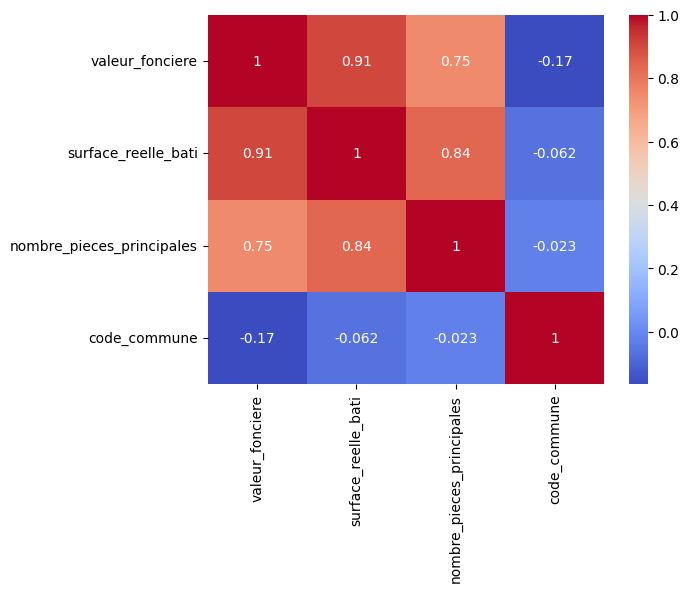

In [57]:
sns.heatmap(df_flats.select_dtypes(include = 'number').corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Une heatmap est réalisée à partir d'une matrice de corrélation des colonnes numériques de df_flats.

Les données 'surface_reelle_bati' et 'nombre_pieces_principales' sont les deux valeurs qui sont le plus corrélées à la valeur foncière.

### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [33]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison


> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [34]:
X = df_ml_idf.drop('type_local', axis = 1)
y = df_ml_idf['type_local']

# X correspond aux colonnes valeur_fonciere, surface_reelle_bati et nombre_pieces_principales du df_ml_idf.
# y correspond au type de local, étant la valeur recherchée.

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.75)

# La taille du train correspond à 75% du DataFrame total.

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [37]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Score for the Train dataset :", round(accuracy, 5))

Score for the Train dataset : 0.78153


In [38]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Score for the Train dataset :", round(accuracy, 5))

Score for the Train dataset : 0.79269


Grâce à la métrique 'accuracy_score', nous voyons que les 2 modèles ne sont pas suffisamment performants pour prédire le type de local.

**Réponse :**

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

Les méthodes de Machine Learning peuvent être impactées par des bases de données trop réduites, qui limitent la pertinence d'un modèle entrainé.

Selon les cas et les paramètres des modèles, il peut y avoir un sur-entrainement ou un sous-entrainement, ce qui rend les résultats non pertinents.

**Réponse :**

> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
mc = pd.DataFrame(data = confusion_matrix(y_test, y_pred))
mc

,0,1
0,9769,3045
1,2790,12542


Selon la matrice de confusion, le modèle a correctement prédit 9 988 + 11 993 types de local, mais a fait de mauvaises prédictions pour 3 339 + 2 826 locaux.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 appartement       0.78      0.76      0.77     12814
      maison       0.80      0.82      0.81     15332

    accuracy                           0.79     28146
   macro avg       0.79      0.79      0.79     28146
weighted avg       0.79      0.79      0.79     28146



In [42]:
VP = mc.loc[0,0]
FP = mc.loc[1,0]
FN = mc.loc[0,1]



print(f"La précision est la proportion sur l'ensemble des prédictions positives bien effectuées: {round(VP / (VP + FP) * 100, 2)}%.")



print(f'Le recall mesure la proportion des données réellement positives qui ont été prédites: {round(VP / (VP + FN) * 100, 2)}%.')

La précision est la proportion sur l'ensemble des prédictions positives bien effectuées: 77.78%.
Le recall mesure la proportion des données réellement positives qui ont été prédites: 76.24%.


# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

IMPORTATION DES DONNÉES / FONCTIONS UTILISÉES

In [43]:
from collections import Counter

In [44]:
def annee(liste):

    if len(liste) == 2:

        # Cas selon plusieurs années ressortent du regex.

        liste2 = []
        annee_list = []

        for element in liste:
            liste2.append(int(element))

            # Transformation de la donnée en integer.

        for element in liste2:
            if element < 2025 and element > 1930:
                annee_list.append(element)

                # Conservation des données comprises entre les données les plus fréquentes du df.

        return annee_list[0]

    elif len(liste) == 1:

        # Cas où une seule année est ressortie.

        if liste[0] != '':

            # Cas où la liste n'est pas vide.
            # Alors on retour l'integer de la donnée trouvée.

            return int(liste[0])

In [45]:
df_domaine = pd.read_csv('https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv')
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


SUPPRESSION DES LIGNES VIDES OU NON PERTINENTES

In [47]:
df = df[df['price'].isna() == False]

df = df[df['variety'].isna() == False]

df = df[df['country'].isna() == False]

df = df[df['variety'].str.contains('Champagne') == False]

In [48]:
df.isna().sum()

,0
country,0
description,0
designation,34759
points,0
price,0
province,0
region_1,19499
region_2,69478
taster_name,24371
taster_twitter_handle,29267


RÉCUPÉRATION DES ANNÉES ET CRÉATION DE LA COLONNE

In [49]:
df['annee_vin'] = df['title'].apply(lambda x : re.findall(r'\d{4}', x))

df['annee_vin'] = df['annee_vin'].apply(lambda x : annee(x))

DÉTECTION DES CÉPAGES ET CRÉATION DE LA COLONNE

In [50]:
df['variety'] = df['variety'].astype(str)

df['variety'] = df['variety'].apply(lambda x : x.lower())

texte = ""

for n in range(len(df)):
    texte += " " + df['variety'].iloc[n]

texte = texte.replace('-', '').replace("'", '')

liste_texte = texte.split(" ")

if '' in liste_texte:
    liste_texte.remove('')

liste_propre = []

for element in liste_texte:
    if len(element) > 3:
        liste_propre.append(element)

cepages = []

for element in liste_propre:

    element = element.lower()

    if element not in ['blanche', 'red', 'rouge', 'black',  'noir', 'white', 'blanc', 'blanca', 'bianco', 'style',  'franc', 'blend', 'petite' 'petit',  'petits', 'gris', 'gros', 'fumé', 'rosé', 'franca', 'port', 'negro']:
        cepages.append(element)


resultat = Counter(cepages)

if 'style' in resultat.keys():
    del resultat['style']

varietes = []


for element in resultat.keys():
    if element[0] == ' ':
        element = element[1:]
    if element[-1] == ' ':
        element = element[:-1]

    varietes.append(element)


df['cat_variety'] = ""



for element in varietes:
    df['cat_variety'] = df.apply(lambda x : x['cat_variety'] + " " + element if element in x['variety'] else x['cat_variety'], axis = 1)

df['cat_variety'] = df['cat_variety'].astype(str)

df['cat_variety'] = df['cat_variety'].str.strip()

df['cat_variety'] = df['cat_variety'].apply(lambda x : None if x == '' else x)

DÉTECTION DES VARIÉTÉS DE VIN ET CRÉATION DE LA COLONNE

In [51]:
couleurs =  ['red', 'rouge', 'black', 'noir', 'white', 'blanc', 'blanca', 'bianco', 'gris', 'rosé', 'negro', 'blanche']

df['couleur'] = ""

for element in couleurs:
    df['couleur'] = df.apply(lambda x : x['couleur'] + " " + element.lower().replace('red', 'rouge').replace('white', 'blanc').replace('bianco', 'blanc').replace('negro', 'noir').replace('blanca', 'blanc').replace('black', 'noir').replace('blanche', 'blanc')
                             if element in x['variety'] else x['couleur'], axis = 1)

df['couleur'] = df['couleur'].apply(lambda x : x.lower() if type(x) == str else x)

df['couleur'] = df['couleur'].str.strip()

dico_couleurs = {'gris' : 'blanc / gris',
                'blanc' : 'blanc / gris',
                'blanc blanc' : 'blanc / gris',
                'noir' : 'rouge / noir',
                'rouge' : 'rouge / noir'}

for element in dico_couleurs:
    df['couleur'] = df['couleur'].apply(lambda x : dico_couleurs[element] if x == element else x)


CRÉATION DES TRANCHES POUR LES COLONNES NUMÉRIQUES

In [52]:
colonnes = ['annee_vin', 'price']

for element in colonnes:
    Q1 = df[element].quantile(0.25)
    Q3 = df[element].quantile(0.75)
    IQR = Q3 - Q1
    bas = Q1 - 1.5 * IQR
    haut = Q3 + 1.5 * IQR
    df = df[df[element] > bas]
    df = df[df[element] < haut]

for element in colonnes:
    df[f'tranche_{element}'] = pd.qcut(df[df[element].isna() == False][element], q = 10, duplicates='drop')

df['tranche_points'] = pd.qcut(df[df['points'].isna() == False]['points'], q = 10, duplicates='drop')

df['tranche_price'] = df['tranche_price'].astype(str)
df['tranche_price'] = df['tranche_price'].apply(lambda x : x.replace('nan', 'Prix inconnu'))

df['tranche_annee_vin'] = df['tranche_annee_vin'].astype(str)
df['tranche_annee_vin'] = df['tranche_annee_vin'].apply(lambda x : x.replace('nan', 'Année inconnue'))

df['tranche_points'] = df['tranche_points'].astype(str)
df['tranche_points'] = df['tranche_points'].apply(lambda x : x.replace('nan', 'Points inconnus'))

RÉCUPÉRATION DES ANNÉES ET CRÉATION DE LA COLONNE POUR LE DF_DOMAINE

In [53]:
df_domaine['annee_vin'] = df_domaine['title'].apply(lambda x : re.findall(r'\d{4}', x))

df_domaine['annee_vin'] = df_domaine['annee_vin'].apply(lambda x : annee(x))

EXPORTATION DES DONNÉES

In [54]:
df_domaine.to_csv('df_domaine.csv')

In [55]:
df.to_csv('df_business_case.csv')